# 1.2 PyTorch for Computer Vision

In this note, we will address some of the basic commands that you will need from PyTorch in general and in computer vision in particular.

<!---
- [Basic PyTorch commands](#Basic-PyTorch-commands)
- [Computer vision data sets](#Computer-vision-data-sets)
- [Transforms](#Transforms)
- [Exercises](#Exercises)
-->

First, we import the required libraries. These should all be available on Google Colab.

In [ ]:
import torch # PyTorch
import torchvision # Computer vision
# Data sets and transforms
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Other libraries
import matplotlib.pyplot as plt
import numpy as np

You can, e.g., check your PyTorch

In [ ]:
torch.__version__

'2.5.1+cu121'

## Basic PyTorch commands

PyTorch has its own objects: PyTorch tensors. All data will have to be put in this format.

In [ ]:
scalar = torch.tensor(1)
vector = torch.tensor([1, 2])

If you already have a tensor object, you can print different properties.

In [ ]:
print(vector.ndim, vector.shape,vector.dtype)

1 torch.Size([2]) torch.int64


Many of the commands (such as the method creating vectors with ones in each entry) mirror the corresponding commands in numpy.

In [ ]:
t0 = torch.zeros(size=(3,1))
print(t0)
t1 = torch.ones(size=(3,1))
print(t1)

tensor([[0.],
        [0.],
        [0.]])
tensor([[1.],
        [1.],
        [1.]])


Just like in numpy you can, for instance, easily perform element-wise multiplication, multiply a tensor with a scalar or determine the index of the entry with the maximum or minimum value. But not everything is the same.

In [ ]:
print(10*vector)
print(vector*vector)
print(vector.argmax())
print(vector.argmin())

tensor([10, 20])
tensor([1, 4])
tensor(1)
tensor(0)


When creating so-called batches (see Lecture 1) of data in later notebooks, we will sometimes need to be able to add a dimension to a tensor. We thus keep the content of the data but add an empty dimension along the dimension dim.

In [ ]:
torch.unsqueeze(vector,dim=0)

tensor([[1, 2]])

You can also turn PyTorch tensors into numpy objects

In [ ]:
vector.numpy()

array([1, 2])

Or numpy objects into tensors.

In [ ]:
array = np.arange(1,3)
torch.from_numpy(array)

tensor([1, 2])

For more basic PyTorch commands, see the exercises below.

## Computer vision data sets

In this course, we will dive into Deep Learning for computer vision, i.e., we will be working with image data. Torchvision provides a long list of datasets that are commonly used for this purpose.

In [ ]:
# Available datasets
print(datasets.__all__)

('LSUN', 'LSUNClass', 'ImageFolder', 'DatasetFolder', 'FakeData', 'CocoCaptions', 'CocoDetection', 'CIFAR10', 'CIFAR100', 'EMNIST', 'FashionMNIST', 'QMNIST', 'MNIST', 'KMNIST', 'StanfordCars', 'STL10', 'SUN397', 'SVHN', 'PhotoTour', 'SEMEION', 'Omniglot', 'SBU', 'Flickr8k', 'Flickr30k', 'Flowers102', 'VOCSegmentation', 'VOCDetection', 'Cityscapes', 'ImageNet', 'Caltech101', 'Caltech256', 'CelebA', 'WIDERFace', 'SBDataset', 'VisionDataset', 'USPS', 'Kinetics', 'HMDB51', 'UCF101', 'Places365', 'Kitti', 'INaturalist', 'LFWPeople', 'LFWPairs', 'KittiFlow', 'Sintel', 'FlyingChairs', 'FlyingThings3D', 'HD1K', 'Food101', 'DTD', 'FER2013', 'GTSRB', 'CLEVRClassification', 'OxfordIIITPet', 'PCAM', 'Country211', 'FGVCAircraft', 'EuroSAT', 'RenderedSST2', 'Kitti2012Stereo', 'Kitti2015Stereo', 'CarlaStereo', 'Middlebury2014Stereo', 'CREStereo', 'FallingThingsStereo', 'SceneFlowStereo', 'SintelStereo', 'InStereo2k', 'ETH3DStereo', 'wrap_dataset_for_transforms_v2', 'Imagenette')


To dowload and import the training set from the MNIST data set, we use the command

In [ ]:
trainset_mnist_0 = datasets.MNIST(root='./data', train=True, download=True)

Note that not all datasets listed above can be easily downloaded with one line of code.

We can plot individual images from this data set using matplotlib. Each image is a PyTorch tensor object.

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


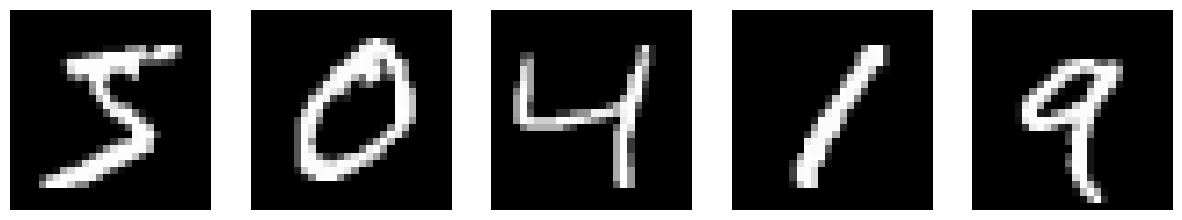

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = trainset_mnist_0.data[i]
    print(type(img))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

Let's try a different dataset.

In [ ]:
trainset_cifar10_0 = datasets.CIFAR10(root='./data', train=True, download=True)

Files already downloaded and verified


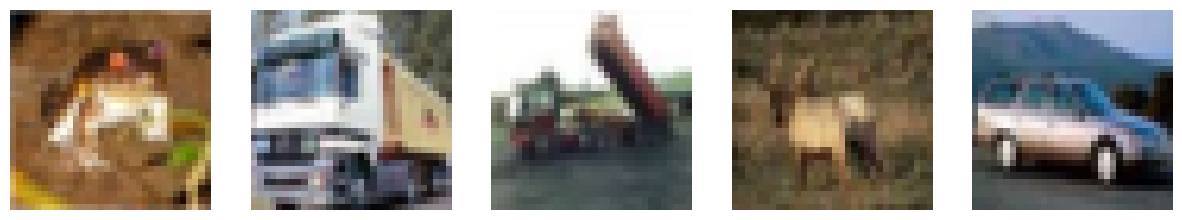

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = trainset_cifar10_0.data[i]
    axes[i].imshow(img)
    axes[i].axis('off')

## Transforms

Before we can pass the data to our Deep Learning model, we will often have to transform it to ensure that it has the correct format. Maybe the images are too small or too large compared to the images on which we have trained our model. It is also common practice to normalise the images before passing them to the Deep Learning model, as this approach is beneficial for convergence, stability during training and the generalisation of the network.

Let's define a transform for normalisation.

In [ ]:
# MNIST is black and white. So, we only need one color channel. Other data sets have three
means = (0.5)
stds = (0.5)

# Define the data transform including normalization
transform_mnist_0 = transforms.Compose([
    transforms.ToTensor(),  # convert to PyTorch tensor
    transforms.Normalize(mean=means, std=stds)  # normalize images
])

# In contrast, CIFAR10 provides pictures with three channels (RGB).

means10 = (0.5,0.5,0.5)
stds10 = (0.5,0.5,0.5)

# Define the data transform including normalization
transform_cifar10_0 = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor
    transforms.Normalize(means10, stds10),  # Normalize to a range of -1 to 1 for three channels
])

If we had defined the transform before we loaded the data, we could have applied the transform to the data right away. However, we can still do so retrospectively.

In [ ]:
# Apply the transform to the dataset
trainset_cifar10_0.transform = transform_cifar10_0

We can divide the entire dataset into smaller batches, shuffle it and provide an iterable interface for retrieving batches during the training process using the DataLoader class.

In [ ]:
train_loader_cifar10 = DataLoader(trainset_cifar10_0, batch_size=32, shuffle=True)

If you plot the image, you can now see that the colours are a bit off because we normalised the image.

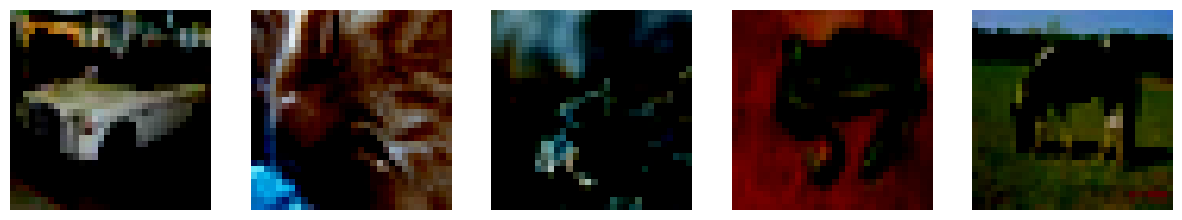

In [ ]:
# Get the first batch from the data loader
dataiter = iter(train_loader_cifar10)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[i].imshow(img)
    axes[i].axis('off')

We can also use transforms for image augmentation, i.e., we scale, translate or rotate the images to create new images. By doing so, we reduce overfitting and introduce scale and orientation invariance.

In [ ]:
transform_mnist_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomflip
    transforms.RandomRotation(degrees=(-90, 90)),  # Random rotation between -90 and 90 degrees
    transforms.ToTensor(),  # convert to PyTorch tensor
    transforms.Normalize(mean=means, std=stds)  # normalize images
])

# Apply the transform to the dataset
trainset_mnist_0.transform = transform_mnist_1
train_loader_mnist = DataLoader(trainset_mnist_0, batch_size=32, shuffle=True)

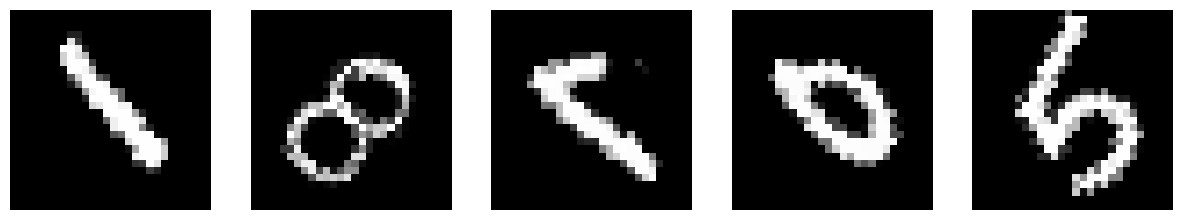

In [ ]:
# Get the first batch from the data loader
dataiter = iter(train_loader_mnist)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[i].imshow(img, cmap="gray")
    axes[i].axis('off')

## Exercises

**Exercise 1**: Find out how to transpose, stack, reshape and permute tensors.

In [ ]:
x = torch.randn(2, 4)
x_t = x.transpose(0, 1)  # Transposes the first and second dimensions
print(x)
print(x_t)

x1 = torch.randn(2, 4)
x2 = torch.randn(2, 4)
stacked = torch.stack((x1, x2), dim=0)  # Creates a new dimension at dim 0
print(stacked.shape)  # Resulting shape will be (2, 2, 4)

x = torch.randn(2, 2)
reshaped = x.reshape(1, 4)  # Reshapes to 2 rows and 8 columns
print(reshaped)

x = torch.randn(2, 3)
permuted = x.permute(1, 0)  # Reorders dimensions (2, 3) to (3, 2)
print(permuted.shape)  # Resulting shape will be (3, 2)

tensor([[-0.9793,  2.4250, -1.6507,  2.2428],
        [ 2.1536,  0.5142, -1.2526, -0.2990]])
tensor([[-0.9793,  2.1536],
        [ 2.4250,  0.5142],
        [-1.6507, -1.2526],
        [ 2.2428, -0.2990]])
torch.Size([2, 2, 4])
tensor([[-1.5885, -0.7190, -0.0734, -0.2208]])
torch.Size([3, 2])


**Exercise 2**: Construct a matrix as a PyTorch tensor. Perform matrix multiplication (cf. torch.matmul())

In [ ]:
# Define two 2x3 and 3x2 matrices (tensors)
A = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])  # 2x3 matrix
B = torch.tensor([[7.0, 8.0], [9.0, 10.0], [11.0, 12.0]])  # 3x2 matrix

print("Matrix A:\n", A)
print("Matrix B:\n", B)

# Perform matrix multiplication (result will be 2x2)
C = torch.matmul(A, B)

print("Result of A x B:\n", C)

Matrix A:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Matrix B:
 tensor([[ 7.,  8.],
        [ 9., 10.],
        [11., 12.]])
Result of A x B:
 tensor([[ 58.,  64.],
        [139., 154.]])


**Exercise 3**: Just like you can unsqueeze a tensor, you can squeeze it. Find out how and what it means.

In [ ]:
# Unsqueezing allows us to add extra dimensions (of size 1). This is needed, e.g., when the neural network expects a batch.
# Squeezing then allows you remove dimensions of size 1. Note that this means that there is a limit to how much you can squeeze.

# Create another tensor
x = torch.randn(1, 2, 1, 4)
print("Original tensor shape:", x.shape)

# Squeeze only the first dimension (0) if it's 1
squeezed_dim0 = x.squeeze(0)
print("Shape after squeezing dim 0:", squeezed_dim0.shape)

# Squeeze only the third dimension (2) if it's 1
squeezed_dim2 = x.squeeze(2)
print("Shape after squeezing dim 2:", squeezed_dim2.shape)

Original tensor shape: torch.Size([1, 2, 1, 4])
Shape after squeezing dim 0: torch.Size([2, 1, 4])
Shape after squeezing dim 2: torch.Size([1, 2, 4])


**Exercise 4**: Load and plot examples from another data set from torchvision.

In [ ]:
# This exercise is thought for exploration.

**Exercise 5**: In cell [18] above, where we plot the CIFAR10 images after normalisation, the colours are off. Correct for this by denormalising the picture before plotting.

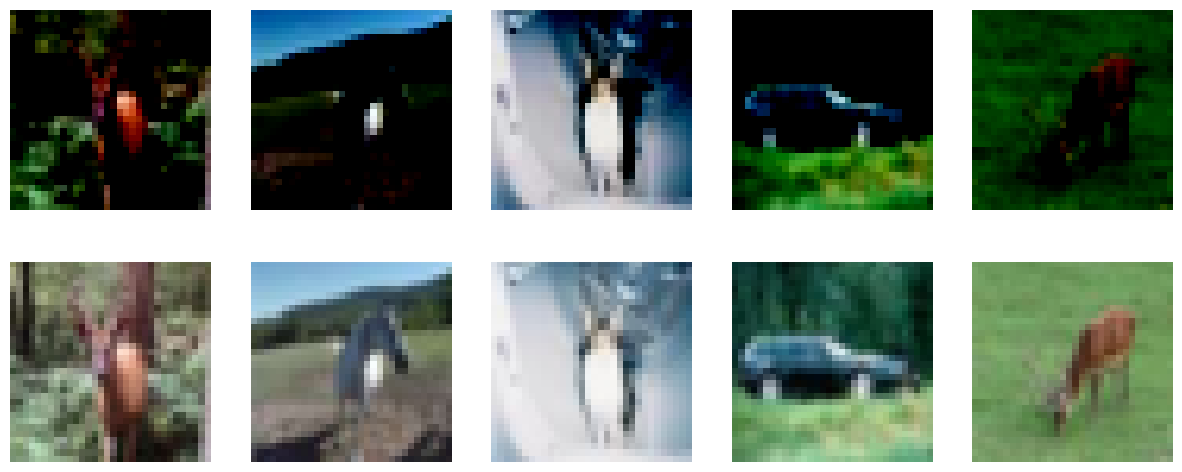

In [ ]:
# Function to denormalize an image
def denormalize(image):
    # Reverse the normalization: image * std + mean
    for i in range(3):  # assuming 3 color channels
        image[i] = image[i] * stds10[i] + means10[i]
    return image

# Get the first batch from the data loader
dataiter = iter(train_loader_cifar10)
images, labels = next(dataiter)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[0,i].imshow(img)
    img2 = denormalize(images[i].clone()).permute(1, 2, 0)
    axes[1,i].imshow(img2)
    axes[0,i].axis('off')
    axes[1,i].axis('off')

**Exercise 6**: Above, we discuss a few transforms for data augmentation. What other transforms are there for this purpose? Write the corresponding code below.

In [ ]:
# This exercise is thought for exploration.